<a href="https://colab.research.google.com/github/TheoHelfenberger/notes-handson-ml/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url,delimiter=";")
df.head()




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [43]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [44]:
# Check for nan values
df[df.isna().any(axis=1)]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [46]:
df.groupby(['quality']).size().reset_index(name='counts')

,quality,counts
0,3,10
1,4,53
2,5,681
3,6,638
4,7,199
5,8,18


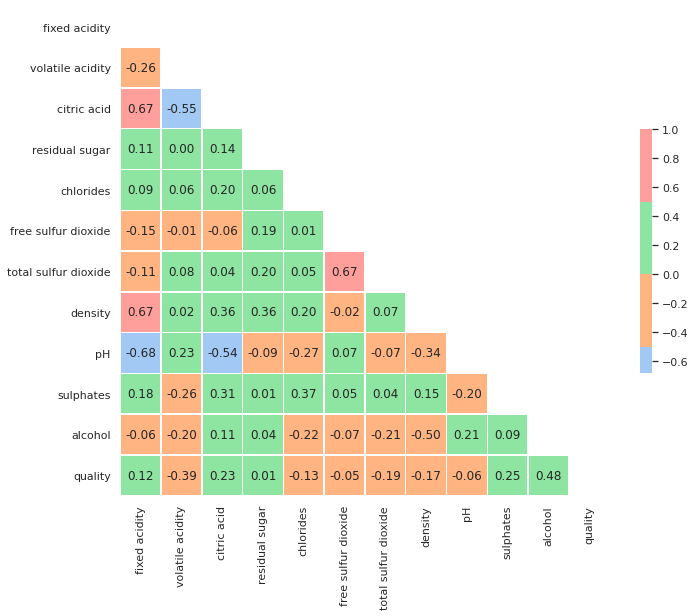

In [47]:
import seaborn as sns

sns.set_theme(style="white")

corr = df.corr()
corr.style.set_precision(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=sns.color_palette("pastel", 4), vmax=1, center=0,
            square=True, annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

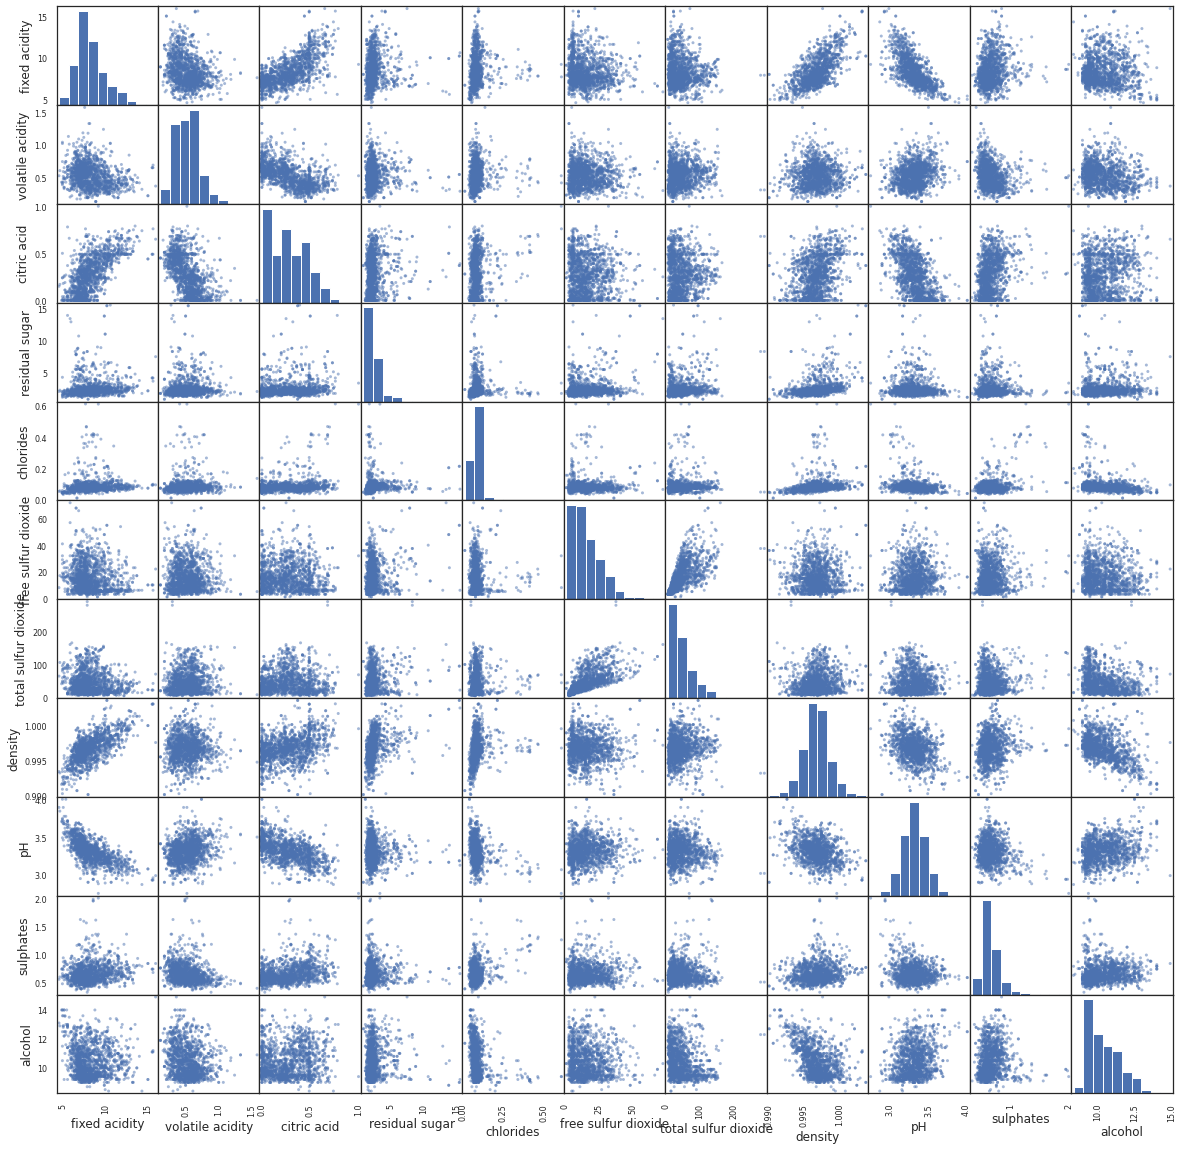

In [48]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(df.iloc[:,:-1], figsize=(20,20))

In [49]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


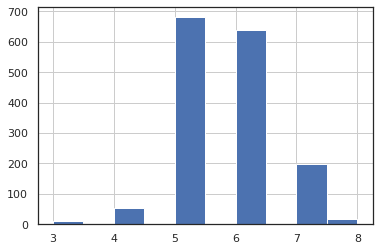

In [50]:
df['quality'].hist()

In [51]:
from sklearn.preprocessing import LabelEncoder
df_copy = df.copy()

bins = (2,4,9)
#labels = ['bad','good']
labels = [0,1]


df_copy['quality'] = pd.cut(df_copy['quality'],bins=bins,labels=labels)
print(df_copy['quality'].value_counts())

le = LabelEncoder()
df_copy['quality'] = le.fit_transform(df_copy['quality'])
df_copy['quality'].value_counts()

1    1536
0      63
Name: quality, dtype: int64


1    1536
0      63
Name: quality, dtype: int64

In [52]:
corr = df_copy.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.05
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.22
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.10
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,-0.02
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.04
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,0.07
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,0.07
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,0.01
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.10
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.08


In [53]:
df_copy.drop(['fixed acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH'],axis=1,inplace=True)

In [54]:
# y = df_copy.pop('quality')
# X = df_copy

X = df_copy.drop('quality',axis=1)
y = df_copy['quality']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.25, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import StandardScaler

lreg_pipe = Pipeline([('std_scaler', StandardScaler()),
                 ('reg',LogisticRegression(max_iter=10000))])

# logisticRegr = LogisticRegression(max_iter=10000)
# model = pipe.fit(x_train, y_train)

In [56]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

y_train_predict = cross_val_predict(lreg_pipe, x_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_predict)
cm

array([[   1,   48],
       [   2, 1148]])

In [57]:
def show_classification_report(classification_report):
  print(f"Accuracy {report.pop('accuracy')}")
  # Build a DataFrame from the classification_report output_dict.
  report_data = []
  for label, metrics in report.items():
      #print(label, metrics)
      metrics['label'] = label
      report_data.append(metrics)

  report_df = pd.DataFrame(
      report_data, 
      columns=['label', 'precision', 'recall', 'f1-score', 'support']
  )

  # Plot as a bar chart.
  res = report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')

Accuracy 0.9582985821517932


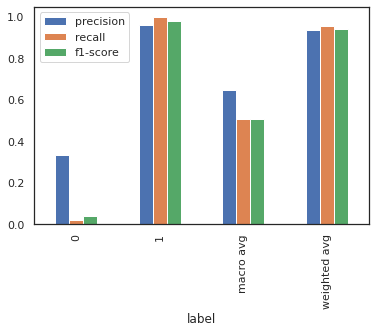

In [58]:
report = classification_report(y_train, y_train_predict, zero_division=False, output_dict=True)
show_classification_report(report)

Accuracy 0.9591326105087573


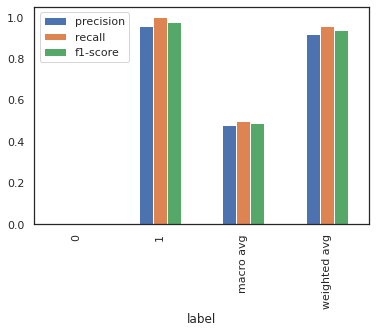

In [59]:
from sklearn.svm import SVC

svc_pipe = Pipeline([('std_scaler', StandardScaler()),
                 ('svc',SVC())])

y_train_svc_predict = cross_val_predict(svc_pipe, x_train, y_train, cv=3)
# cm = confusion_matrix(y_train, y_train_svc_predict)

report = classification_report(y_train, y_train_svc_predict, zero_division=False, output_dict=True)
show_classification_report(report)


In [60]:
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

scores= {}
scores["SVM"] = svm.score(x_test,y_test)

print("Accuracy of SVM:",svm.score(x_test,y_test))

Accuracy of SVM: 0.965


Accuracy 0.9291075896580484


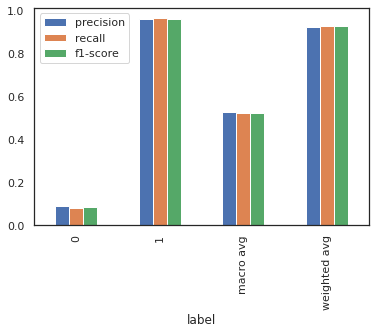

In [61]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
y_train_tree_predict = cross_val_predict(tree_clf, x_train, y_train, cv=3)
# cm = confusion_matrix(y_train, y_train_tree_predict)

report = classification_report(y_train, y_train_tree_predict, zero_division=False, output_dict=True)
show_classification_report(report)


Accuracy 0.9566305254378649


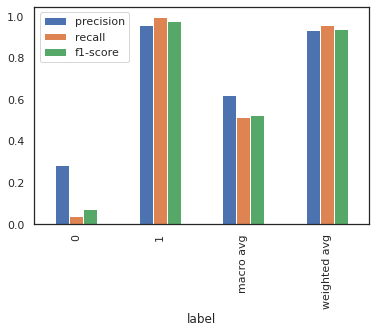

In [62]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
y_train_forest_predict = cross_val_predict(forest_clf, x_train, y_train, cv=3)
# cm = confusion_matrix(y_train, y_train_tree_predict)

report = classification_report(y_train, y_train_forest_predict, zero_division=False, output_dict=True)
show_classification_report(report)

In [63]:
forest_clf.fit(x_train, y_train)

for name, score in zip(X.columns, forest_clf.feature_importances_):
  print(name, score)

volatile acidity 0.40045988055912496
sulphates 0.2936533411428005
alcohol 0.3058867782980746


Accuracy 0.965


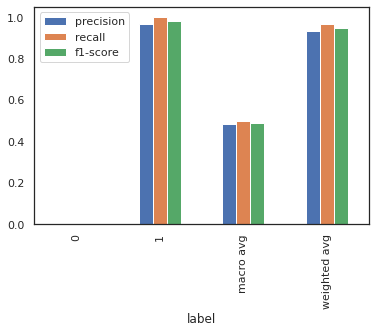

In [64]:
y_test_forest_predict = forest_clf.predict(x_test)
# cm = confusion_matrix(y_train, y_train_tree_predict)

report = classification_report(y_test, y_test_forest_predict, zero_division=False, output_dict=True)
show_classification_report(report)

Accuracy 0.957464553794829


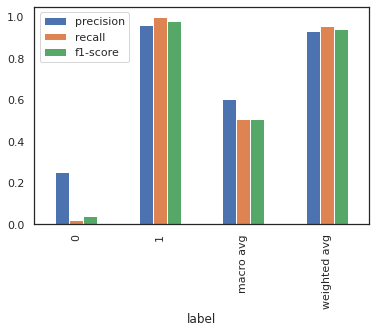

In [65]:
from sklearn.ensemble import VotingClassifier

# voting_clf = VotingClassifier(estimators=[('svc_pipe', SVC()), ('forest', forest_clf), ('lreg', LogisticRegression(max_iter=10000))], voting='hard')
voting_clf = VotingClassifier(estimators=[('forest', forest_clf)], voting='hard')
# y_train_voting_predict = cross_val_predict(voting_clf, x_train, y_train, cv=3)

voting_pipe = Pipeline([('std_scaler', StandardScaler()), ('voting',voting_clf)])

y_train_voting_predict = cross_val_predict(voting_pipe, x_train, y_train, cv=3)
# cm = confusion_matrix(y_train, y_train_tree_predict)

report = classification_report(y_train, y_train_voting_predict, zero_division=False, output_dict=True)
show_classification_report(report)


# voting_pipe.fit(x_train, y_train)



Accuracy 0.957464553794829


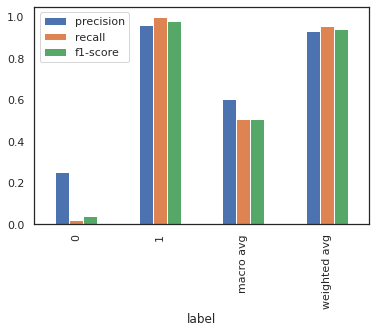

In [66]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=1)

y_train_bagging_predict = cross_val_predict(bag_clf, x_train, y_train, cv=3)
# cm = confusion_matrix(y_train, y_train_tree_predict)

report = classification_report(y_train, y_train_bagging_predict, zero_division=False, output_dict=True)
show_classification_report(report)

Accuracy 0.9424520433694745


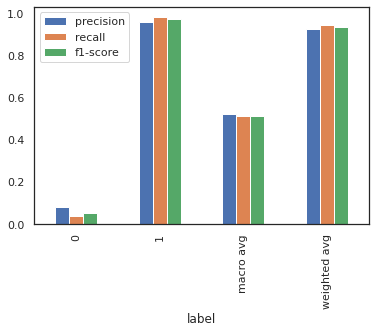

In [67]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)

y_train_ada_predict = cross_val_predict(ada_clf, x_train, y_train, cv=3)
# cm = confusion_matrix(y_train, y_train_tree_predict)

report = classification_report(y_train, y_train_ada_predict, zero_division=False, output_dict=True)
show_classification_report(report)

Accuracy 0.9532944120100083


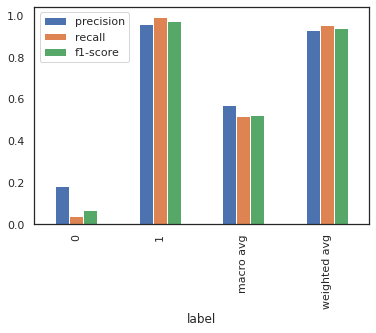

In [79]:
from sklearn.decomposition import PCA

df_copy_pca = df.copy()
X_pca = df_copy_pca.drop('quality',axis=1)
y_pca = df_copy_pca['quality']

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.25, random_state=42)


pca = PCA(n_components = 0.95)
x_train_pca_reduced = pca.fit_transform(x_train_pca)
x_train_pca_reduced

forest_clf = RandomForestClassifier()
y_train_forest_pca_predict = cross_val_predict(forest_clf, x_train_pca_reduced, y_train, cv=3)
# cm = confusion_matrix(y_train, y_train_tree_predict)

report = classification_report(y_train, y_train_forest_pca_predict, zero_division=False, output_dict=True)
show_classification_report(report)

